In [1]:
import torch
import torch.nn as nn
import torch.utils as utils
import torch.nn.init as init
import torch.utils.data as data
import torchvision.utils as v_utils
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
epoch = 10
batch_size = 1
img_size = 256

In [3]:
# input as Torch Tensor
def img_viewer(img):
    img = np.transpose(img[0].numpy(),[1,2,0])
    plt.imshow(img,cmap='gray')
    plt.show()

In [4]:
# Input as PIL image
def random_rotate(img):    
    global rand_rotate
    left = np.asarray(img)[:,:256]
    right = np.asarray(img)[:,256:]
                
    left = np.rot90(left,k=rand_rotate)
    right = np.rot90(right,k=rand_rotate)
    concat = np.concatenate([left,right],axis=1)
    return concat

# Input as PIL image
def flip_ud(img):    
    global rand_ud
    left = np.asarray(img)[:,:256]
    right = np.asarray(img)[:,256:]
                
    if rand_ud %2==0:    
        left = np.flipud(left)
        right = np.flipud(right)
        print("flip_ud")
        
    concat = np.concatenate([left,right],axis=1)
    return concat

# Input as PIL image
def flip_lr(img):    
    global rand_lr
    left = np.asarray(img)[:,:256]
    right = np.asarray(img)[:,256:]
                
    if rand_lr %2==0:    
        left = np.fliplr(left)
        right = np.fliplr(right)
        print("flip_lr")
        
    concat = np.concatenate([left,right],axis=1)
    return concat

# Input as tensor
def gaussian_noise(img):
    global rand_gaussian
    noise = nn.init.normal(torch.Tensor(3,img_size,img_size),mean=0,std=0.02*(rand_gaussian))
    left = img[:,:,:256]+noise
    right = img[:,:,256:]
    
    concat = torch.cat([left,right],dim=2)
    return concat    

# Input as tesnor
def minmax_norm(img):
    left = img[:,:,:256]
    right = img[:,:,256:]
    
    left = (left-left.min())/(left.max()-left.min())
    concat = torch.cat([left,right],dim=2)
    return concat

In [5]:
img_dir = "./data"
img_data = dset.ImageFolder(root=img_dir, transform = transforms.Compose([
                                            transforms.Resize(size=img_size),
                                            transforms.Lambda(lambda x: random_rotate(x)),
                                            transforms.Lambda(lambda x: flip_ud(x)),
                                            transforms.Lambda(lambda x: flip_lr(x)),
                                            transforms.ToTensor(),
                                            transforms.Lambda(lambda x: gaussian_noise(x)),
                                            transforms.Lambda(lambda x: minmax_norm(x)),
                                            ]))
img_batch = data.DataLoader(img_data, batch_size=batch_size,
                            shuffle=True, num_workers=2)


torch.Size([1, 3, 256, 512])


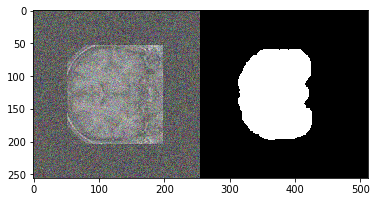

flip_ud
flip_lr
torch.Size([1, 3, 256, 512])


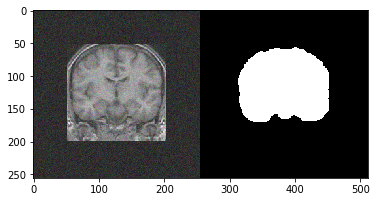

flip_lr
torch.Size([1, 3, 256, 512])


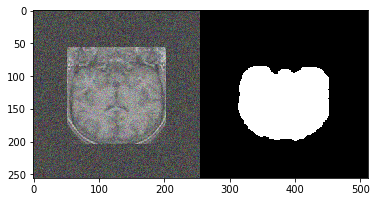

flip_lr
torch.Size([1, 3, 256, 512])


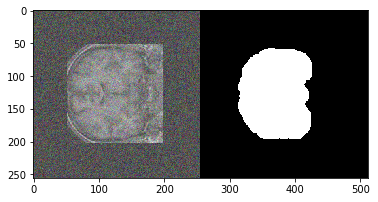

flip_ud
flip_lr
torch.Size([1, 3, 256, 512])


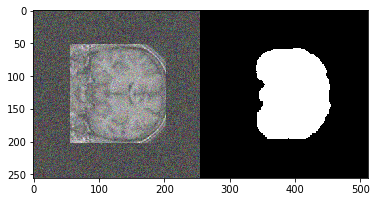

flip_ud
flip_lr
torch.Size([1, 3, 256, 512])


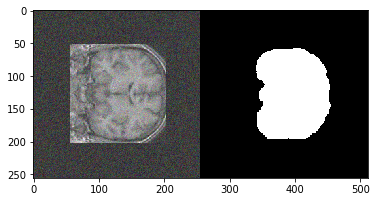

flip_lr
torch.Size([1, 3, 256, 512])


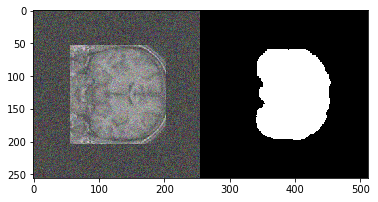

flip_lr
torch.Size([1, 3, 256, 512])


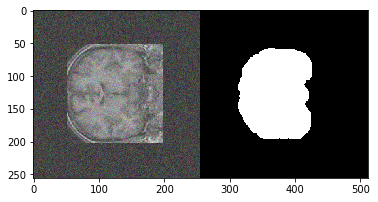

torch.Size([1, 3, 256, 512])


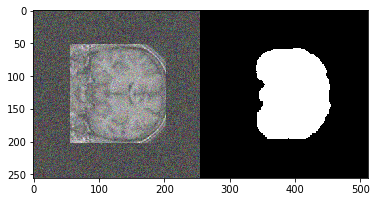

flip_ud
torch.Size([1, 3, 256, 512])


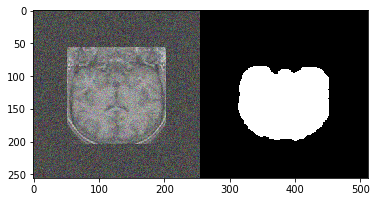

In [8]:
for i in range(epoch):
    rand_rotate = np.random.randint(0,4)
    rand_ud = np.random.randint(0,2)
    rand_lr = np.random.randint(0,2)
    rand_gaussian= np.random.randint(1,10)
    
    for img,_ in img_batch:
        rand_rotate = np.random.randint(0,4)
        rand_ud = np.random.randint(0,2)
        rand_lr = np.random.randint(0,2)
        rand_gaussian= np.random.randint(2,10)
        
        print(img.size())
        img_viewer(img)

In [7]:
for i in range(10):
    rand = np.random.randint(1,10)
    print(rand)

7
7
4
9
7
6
3
3
3
3
